In [3]:
# matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import odl
import scipy.misc
import primal_dual_hybrid_gradient_support as PDHGS

In [15]:
def TV(x, space, x0, Mask, TvIter, supportPrior='no'):
            ########## TV Regularization ####################
    y_real = space.element(x.real.reshape(mask.shape))
    y_imag = space.element(x.imag.reshape(mask.shape))
    
    xr = x0.copy()
    xi = x0.copy()
    TVregularize(y_real, TvAlpha, Mask, xr, space, niter=TvIter, supportPrior=supportPrior)
    # xr.show('real')
    if np.linalg.norm(y_imag) > 1e-3:
        TVregularize(y_imag, TvAlpha, Mask, xi, space, niter=TvIter, supportPrior=supportPrior)
        # xi.show('real')
        
    lincomb = odl.LinCombOperator(space, 1, 1.j)
    XX = odl.ProductSpace(space, space)
    xx = XX.element([xr, xi])
    x = space.element(x.reshape(mask.shape))
    lincomb(xx, out=x)
    # x.show('see')
    
    x = op(x)
    x = x.__array__()
    return x



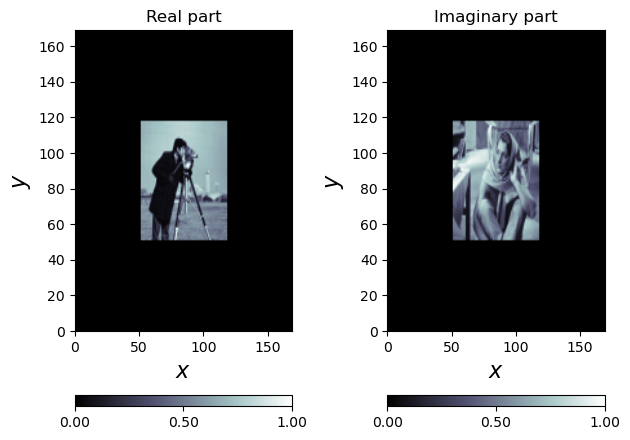

<Figure size 640x480 with 0 Axes>

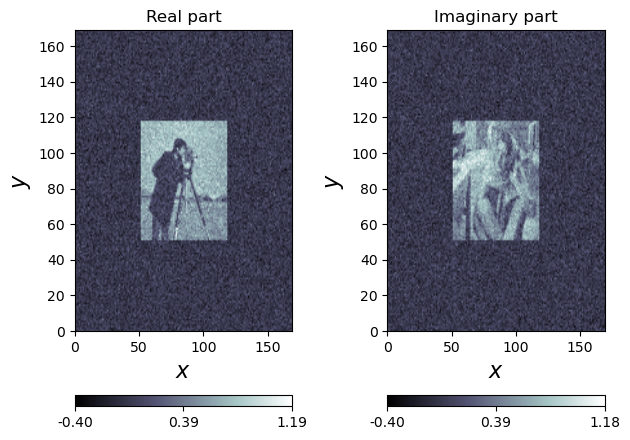

<Figure size 640x480 with 0 Axes>

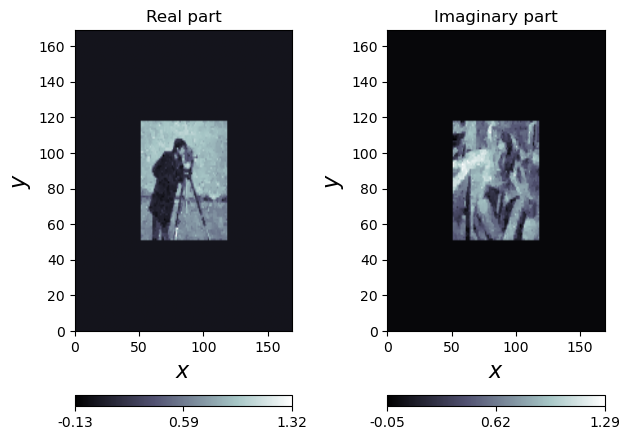

<Figure size 640x480 with 0 Axes>

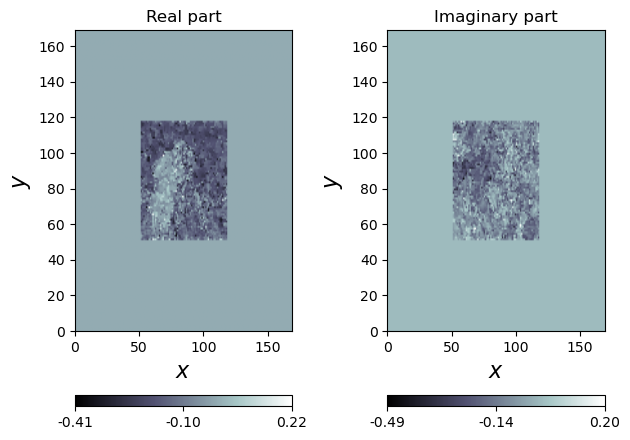

<Figure size 640x480 with 0 Axes>

Noisy
-----
Mean squared error: (0.0198228194355+0j)
PSNR: (18.8869030633+0j)
SSIM: (0.209364620652+0.00144477910592j)

Denoised
--------
Mean squared error: (0.00714735762587+0j)
PSNR: (23.3171021832+0j)
SSIM: (0.985206947137+0.00160189013292j)


In [23]:
from SetUpImage import setUpImage

half_Nx, half_Ny = 84, 84
#half image shape
Nx, Ny = 2 * half_Nx + 1,  2 * half_Ny + 1 #image shape
rx, ry = 1, 1 #for oversampling
n = Nx * Ny #image size
# object support
Kx = 4 * (half_Nx)// 10 # half_Nx #any natural integer between 0 (object is a single point) and half_Nx (object fills up the full image).  
Ky = 4 * (half_Ny)// 10 # half_Ny #any natural integer between 0 (object is a single point) and half_Nx (object fills up the full image).

# mask support
tx = 0. #parameter between 0 (very precise) and 1(no support knowledge) # 0.35  failed already
ty = 0. #parameter between 0 (very precise) and 1(no support knowledge)  

#true_images = setUpImage(Nx, Ny)
s = setUpImage(Nx, Ny, Kx, Ky, tx, ty)

true_images, mask, mask_shepp, exact_mask_shepp, extended_mask_shepp, mask_cancer = s()


image = scipy.datasets.ascent().astype('complex').reshape((512, 512))
image /= image.max()
image =  np.rot90(true_images[12], -1)

# X = odl.uniform_discr(min_pt=[0, 0], max_pt=image.shape, shape=image.shape)
X = odl.uniform_discr(min_pt=[0, 0], max_pt=mask.shape, shape=mask.shape, dtype='complex64')
op = odl.FlatteningOperator(X)

x_true = X.element(image)
x_true.show('true image')
nx = x_true + 0.1  * odl.phantom.white_noise(X) #, seed=42
nx.show('noisy image')
y = nx.copy()
y = y.__array__()



x0 = X.zero()

from TVRegularise import TVregularize


mask = X.element(mask)
TvAlpha = 0.05
TvIter = 10
supportPrior = 'yes'
# plt.imshow(y.real)
dy = TV(y, X, x0, mask, TvIter, supportPrior='yes')
dy = dy.reshape(mask.shape)
# plt.imshow(dy.imag)
dy = X.element(dy)
# TVregularize(y, TvAlpha, mask, x, X, niter=TvIter, supportPrior=supportPrior)
# TVregularize(y, 0.15, mask, x, X)
dy.show('Denoised image');
(x_true - dy).show('Difference true - denoised');
#x.show('Denoised image');
from odl.contrib import fom
print('Noisy')
print('-----')
print('Mean squared error:', fom.mean_squared_error(nx, x_true))
print('PSNR:', fom.psnr(nx, x_true))
print('SSIM:', fom.ssim(nx, x_true))
print('')

print('Denoised')
print('--------')
print('Mean squared error:', fom.mean_squared_error(dy, x_true))
print('PSNR:', fom.psnr(dy, x_true))
print('SSIM:', fom.ssim(dy, x_true))